In [47]:
import pandas as pd
import os

# Define the directory containing the .txt files
directory = '/home/julian/Documents/local-methane-data-diego/2ndVisit/txt/'

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        # Read the .txt file into a DataFrame
        df = pd.read_csv(file_path)
        # Select only the date and measured level columns
        df = df.iloc[:, [0, 1]]
        # Append the data to the all_data DataFrame
        all_data = pd.concat([all_data, df])

# Convert the date column to datetime format
#all_data.iloc[:, 0] = pd.to_datetime(all_data.iloc[:, 0], format="%H:%M:%S.%f")

# Sort the DataFrame by the date column
all_data.sort_values(by=all_data.columns[0], inplace=True)

# Save the combined and sorted data to a new .txt file
all_data.to_csv('combined_sorted_data.txt', index=False, header=True)

In [58]:
import numpy as np
all_data['hour'] = all_data['DATE'].apply(lambda x: int(float((x.split(':')[0]))))
all_data['minute'] = all_data['DATE'].apply(lambda x: int(float(x.split(':')[1])))
all_data['second'] = all_data['DATE'].apply(lambda x: float(x.split(':')[2]))

all_data['hour_sin'] = np.sin(2 * np.pi * all_data['hour'] / 24)
all_data['hour_cos'] = np.cos(2 * np.pi * all_data['hour'] / 24)
all_data['minute_sin'] = np.sin(2 * np.pi * all_data['minute'] / 60)
all_data['minute_cos'] = np.cos(2 * np.pi * all_data['minute'] / 60)
all_data['second_sin'] = np.sin(2 * np.pi * all_data['second'] / 60)
all_data['second_cos'] = np.cos(2 * np.pi * all_data['second'] / 60)

all_data.drop(columns=['DATE', 'hour', 'minute', 'second'], inplace=True)

In [59]:
all_data

,MEAS,hour_sin,hour_cos,minute_sin,minute_cos,second_sin,second_cos
0,123,-0.965926,-2.588190e-01,-0.913545,-0.406737,-1.000000,-1.836970e-16
1,56,-0.965926,-2.588190e-01,-0.913545,-0.406737,-0.998630,5.233596e-02
2,305,-0.965926,-2.588190e-01,-0.913545,-0.406737,-0.994522,1.045285e-01
3,59,-0.965926,-2.588190e-01,-0.913545,-0.406737,-0.987688,1.564345e-01
4,3,-0.965926,-2.588190e-01,-0.913545,-0.406737,-0.978148,2.079117e-01
...,...,...,...,...,...,...,...
252,70,-1.000000,-1.836970e-16,-0.104528,-0.994522,1.000000,2.832769e-16
253,79,-1.000000,-1.836970e-16,-0.104528,-0.994522,0.998630,-5.233596e-02
254,144,-1.000000,-1.836970e-16,-0.104528,-0.994522,0.994522,-1.045285e-01
255,203,-1.000000,-1.836970e-16,-0.104528,-0.994522,0.987688,-1.564345e-01


In [36]:
import plotly.express as px

# Plot the data
fig = px.line(all_data, x='DATE', y='MEAS', title='Measured Levels Over Time')

# Show the plot
fig.show()

In [37]:
all_data['DATE'].dt.hour

AttributeError: Can only use .dt accessor with datetimelike values

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pred = np.load("../results/long_term_forecast_traffic_40_40_Autoformer_custom_ftS_sl40_ll20_pl30_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/pred.npy")
true = np.load("../results/long_term_forecast_traffic_40_40_Autoformer_custom_ftS_sl40_ll20_pl30_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/true.npy")

In [5]:
print(pred.shape, true.shape)

(51, 30, 1) (51, 30, 1)


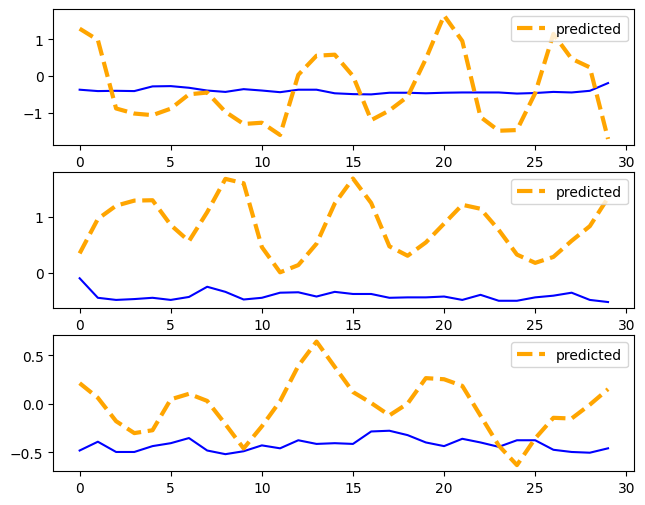

In [12]:
fig, ax = plt.subplots(nrows = 3, ncols = 1)
fig.set_size_inches(7.5, 6)
for col in ax:
    r = np.random.randint(0, pred.shape[0])
    target_seq = true[r, :, :].squeeze().tolist()
    pred_seq = pred[r, :, :].squeeze().tolist()
    x_axis = range(len(target_seq))
    col.plot(x_axis[:], target_seq, color = 'blue')
    col.plot(x_axis[:],
             pred_seq,
             label = 'predicted',
             color = 'orange',
             linestyle = '--',
             linewidth = 3)
    col.legend(loc = "upper right")
plt.show()